In [19]:
import numpy as np

import noisyreach.plotter_matplotlib as nplot
from noisyreach.linear_sim import LinearSim

v = 6.5
L = 0.3302
A = np.array([[0, v], [0, 0]])
B = np.array([[0], [v / L]])

x0 = np.array([1.0, 0.0])
period = 0.02
time_horizon = 2
time_step = 0.01

sim = LinearSim("F1", A, B, period=period)
sim.update_controller("manual", K=np.array([[0.2935, 0.05]]))
t = sim.simulate(x0, time_horizon, time_step)
t

array([[ 0.     ,  1.     ,  0.     ],
       [ 0.01   ,  1.     ,  0.     ],
       [ 0.02   ,  1.     ,  0.     ],
       [ 0.03   ,  0.99812, -0.05778],
       [ 0.04   ,  0.99249, -0.11555],
       [ 0.05   ,  0.98315, -0.17176],
       [ 0.06   ,  0.97016, -0.22796],
       [ 0.07   ,  0.95359, -0.28177],
       [ 0.08   ,  0.93353, -0.33558],
       [ 0.09   ,  0.91007, -0.38621],
       [ 0.1    ,  0.88332, -0.43684],
       [ 0.11   ,  0.85341, -0.48358],
       [ 0.12   ,  0.82046, -0.53031],
       [ 0.13   ,  0.78462, -0.57249],
       [ 0.14   ,  0.74604, -0.61468],
       [ 0.15   ,  0.70488, -0.65173],
       [ 0.16   ,  0.66131, -0.68878],
       [ 0.17   ,  0.61552, -0.72021],
       [ 0.18   ,  0.56768, -0.75164],
       [ 0.19   ,  0.518  , -0.77704],
       [ 0.2    ,  0.46667, -0.80244],
       [ 0.21   ,  0.41389, -0.8215 ],
       [ 0.22   ,  0.35987, -0.84057],
       [ 0.23   ,  0.30483, -0.85309],
       [ 0.24   ,  0.24897, -0.8656 ],
       [ 0.25   ,  0.1925

In [20]:
sim.sensing_error_std = np.array([0.3, 0.0])
tes = []
for p in [0.02, 0.03, 0.04, 0.06]:
    sim.update_period(p)
    tes += [sim.simulate(x0, time_horizon, time_step) for _ in range(2)]
tes[0]

array([[ 0.     ,  1.     ,  0.     ],
       [ 0.01   ,  1.     ,  0.     ],
       [ 0.02   ,  1.     ,  0.     ],
       [ 0.03   ,  0.99875, -0.03859],
       [ 0.04   ,  0.99498, -0.07718],
       [ 0.05   ,  0.98925, -0.09915],
       [ 0.06   ,  0.98209, -0.12112],
       [ 0.07   ,  0.97267, -0.16882],
       [ 0.08   ,  0.96015, -0.21653],
       [ 0.09   ,  0.94502, -0.24886],
       [ 0.1    ,  0.9278 , -0.28119],
       [ 0.11   ,  0.90931, -0.28762],
       [ 0.12   ,  0.89041, -0.29404],
       [ 0.13   ,  0.86992, -0.33639],
       [ 0.14   ,  0.84667, -0.37873],
       [ 0.15   ,  0.82083, -0.41653],
       [ 0.16   ,  0.79253, -0.45433],
       [ 0.17   ,  0.76208, -0.48244],
       [ 0.18   ,  0.72981, -0.51055],
       [ 0.19   ,  0.69558, -0.54253],
       [ 0.2    ,  0.65928, -0.5745 ],
       [ 0.21   ,  0.62131, -0.59373],
       [ 0.22   ,  0.58209, -0.61295],
       [ 0.23   ,  0.54184, -0.62553],
       [ 0.24   ,  0.50078, -0.63811],
       [ 0.25   ,  0.4591

In [ ]:
SAFE_MARGIN = 0.2

fig = nplot.new_plot(plot3d=False)
for te in tes:
    dev = np.linalg.norm((t - te)[:, 1:], axis=1)
    if max(dev) < SAFE_MARGIN:
        nplot.plot_trace(
            fig, te, color="green", x_dim=1, y_dim=2, name="safe", alpha=0.5
        )
    else:
        nplot.plot_trace(
            fig, te, color="red", x_dim=1, y_dim=2, name="unsafe", alpha=0.5
        )
nplot.plot_safetube(fig, t, SAFE_MARGIN, x_dim=1, y_dim=2)

# fig.show(renderer="browser")
nplot.show(fig)

18


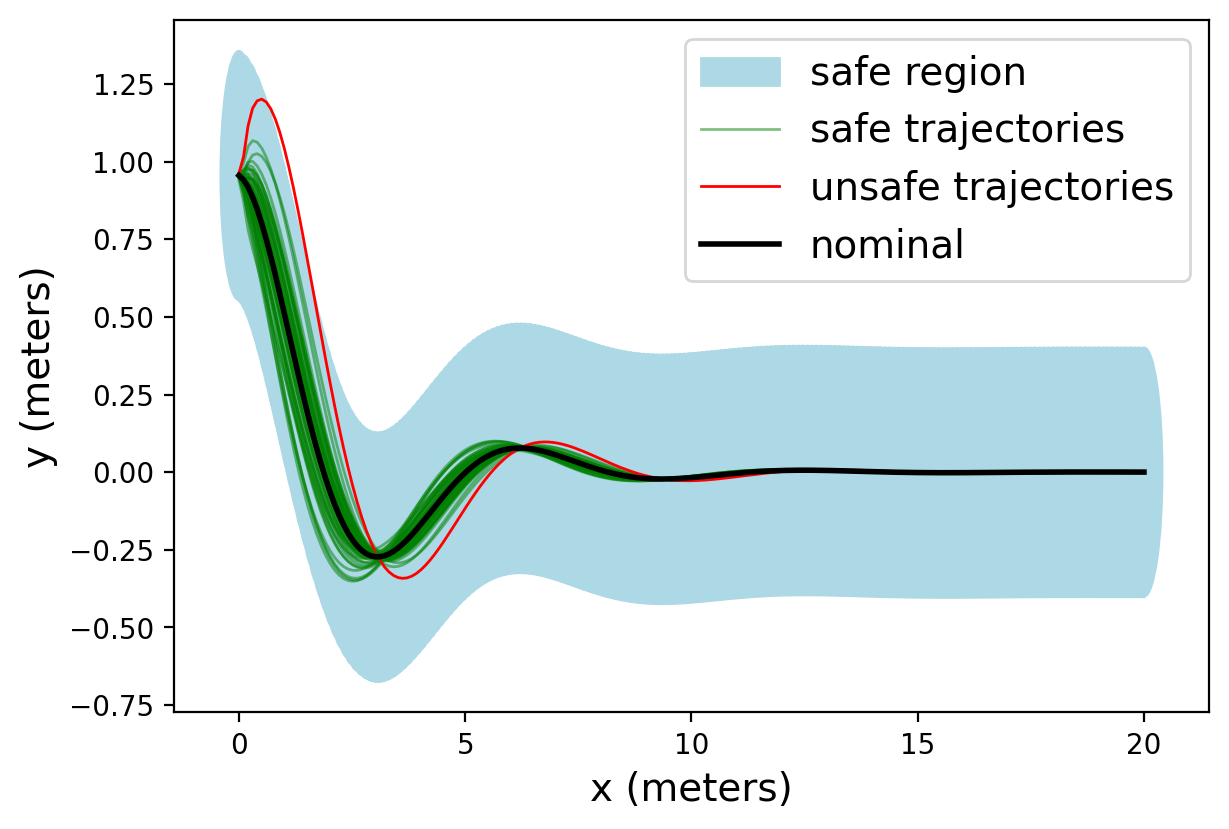

In [174]:
r = 0.4
a, b, c = -0.4, 1.0, -0.3

t = np.linspace(0, 20, 200)
# y is the position of a damped oscillator
ynom = np.exp(a * t) * b * (np.cos(t + c))
# Generate 50 random a, b, and c values around the nominal values and generate corresponding y values

s = 17
while True:
    np.random.seed(s)
    s += 1
    ys = [
        np.exp(a * t)
        * b
        * (np.cos(t + c) + 1 / (1 + np.exp(-((t - 0.1) * 20))) * bx * np.sin(t + cx))
        for bx, cx in zip(np.random.normal(0, 0.27, 50), np.random.normal(0, 0.15, 50))
    ]
    if np.max(np.abs(ynom - ys)) > r:
        print(s)
        break

# plot y over t
fig = nplot.new_plot(plot3d=False)
nplot.plot_safetube(fig, np.column_stack([t, ynom]), r, x_dim=0, y_dim=1)
for y in ys:
    if np.max(np.abs(y - ynom)) < r:
        nplot.plot_trace(
            fig,
            np.column_stack([t, y]),
            color="green",
            x_dim=0,
            y_dim=1,
            alpha=0.5,
            name="safe trajectories",
        )
    else:
        nplot.plot_trace(
            fig,
            np.column_stack([t, y]),
            color="red",
            x_dim=0,
            y_dim=1,
            alpha=1.0,
            name="unsafe trajectories",
        )
nplot.plot_nominal(fig, np.column_stack([t, ynom]), x_dim=0, y_dim=1)
nplot.show(fig, xlabel="x (meters)", ylabel="y (meters)")

In [175]:
nplot.savefig(fig, "linear.pdf")